In this model the transformer is set to DoNothingTransformer, instead of the default NormalizationTransformer.

This is simply an experiment to see if the normalization transformer had any negative impact on the model (compared to model 05)

Conclusion: Using the normalization transformer does not have a negative impact.

In [1]:
import utils
import numpy as np
from deepchem import deepchem as dc
from deepchem.models import AttentiveFPModel

Skipped loading modules with pytorch-geometric dependency, missing a dependency. No module named 'torch_sparse'
Skipped loading modules with pytorch-geometric dependency, missing a dependency. cannot import name 'DMPNN' from 'deepchem.models.torch_models' (c:\Users\xsj110\AppData\Local\Programs\Python\Python38\lib\site-packages\deepchem\models\torch_models\__init__.py)
Skipped loading some Jax models, missing a dependency. No module named 'jaxlib'


In [2]:
utils.set_seed(50, tensorflow=False, pytorch=True)

In [3]:
data = utils.load_data('10K.csv', 10000, False)

In [4]:
data

,Unnamed: 0,i_i_glide_lignum,r_i_docking_score,SMILES,molecules,MolWt
0,0,13477,-13.126800,C[C@@H](NC(=O)N1C[C@H](c2ccccc2)[C@H]2COCC[C@H...,<rdkit.Chem.rdchem.Mol object at 0x0000017A43A...,448.567
1,1,516,-12.662900,O=C(Nc1cccc(C(=O)N2CCC(c3c[nH]c4ncccc34)CC2)c1...,<rdkit.Chem.rdchem.Mol object at 0x0000017A43A...,466.541
2,2,9425,-12.487000,Cc1nn(-c2ccccc2)c2nc(C(=O)N3CCC([C@H]4C(=O)Nc5...,<rdkit.Chem.rdchem.Mol object at 0x0000017A43A...,451.530
3,3,14512,-12.483500,Cc1cc(C)cc(C(=O)N2CCC[C@H](C(=O)NCc3cccc([C@@]...,<rdkit.Chem.rdchem.Mol object at 0x0000017A43A...,462.550
4,4,9615,-12.478500,CS(=O)(=O)c1ccc(F)c(C(=O)Nc2ccc(-c3nc(-c4ccccc...,<rdkit.Chem.rdchem.Mol object at 0x0000017A43A...,436.468
...,...,...,...,...,...,...
9893,9893,2451,-0.560302,O=C([O-])C(F)(F)F,<rdkit.Chem.rdchem.Mol object at 0x0000017A439...,113.014
9894,9894,7813,-0.384887,Cc1cnn(C)c1S(=O)(=O)NC[C@@H](Cc1ccccn1)C(=O)[O-],<rdkit.Chem.rdchem.Mol object at 0x0000017A439...,337.381
9895,9895,11442,-0.269109,Cn1cccc(C(=O)N2CCN(C3CC3)c3ccc(Cl)cc32)c1=O,<rdkit.Chem.rdchem.Mol object at 0x0000017A439...,343.814
9896,9896,13971,-0.150473,O=C([O-])[C@H]1CC[C@@H](C(=O)N2CCCc3ccccc32)CC1,<rdkit.Chem.rdchem.Mol object at 0x0000017A439...,286.351


In [5]:
featurizer = dc.feat.MolGraphConvFeaturizer(use_edges=True)
train_data, valid_data, test_data, transformer = utils.receptor_data(data, 'r_i_docking_score', featurizer, input_transformer=utils.DoNothingTransformer)

In [9]:
metric = dc.metrics.Metric(dc.metrics.r2_score)

model = AttentiveFPModel(
    n_tasks=1,
    mode='regression',
)

train_model = utils.fit_best_model(
    model,
    train_data,
    valid_data,
    [metric],
    [transformer],
    patience=3,
    high_is_better=True,
    model_name="AttentiveFPModel"
)

Epoch 1/100
{'r2_score': 0.29262359637993474}
Epoch 2/100
{'r2_score': 0.4054520080809889}
Epoch 3/100
{'r2_score': 0.5691506639392412}
Epoch 4/100


Exception ignored in: <function Model.__del__ at 0x0000017A34D4CCA0>
Traceback (most recent call last):
  File "c:\Users\xsj110\AppData\Local\Programs\Python\Python38\lib\site-packages\deepchem\models\models.py", line 60, in __del__
    shutil.rmtree(self.model_dir)
  File "c:\Users\xsj110\AppData\Local\Programs\Python\Python38\lib\shutil.py", line 740, in rmtree
    return _rmtree_unsafe(path, onerror)
  File "c:\Users\xsj110\AppData\Local\Programs\Python\Python38\lib\shutil.py", line 599, in _rmtree_unsafe
    onerror(os.scandir, path, sys.exc_info())
  File "c:\Users\xsj110\AppData\Local\Programs\Python\Python38\lib\shutil.py", line 596, in _rmtree_unsafe
    with os.scandir(path) as scandir_it:
FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Users\\xsj110\\AppData\\Local\\Temp\\tmph369d0kb'


{'r2_score': 0.45433771265029865}
Epoch 5/100
{'r2_score': 0.6018888834261464}
Epoch 6/100
{'r2_score': 0.6093213196097298}
Epoch 7/100
{'r2_score': 0.6270367200178012}
Epoch 8/100
{'r2_score': 0.6383354057939932}
Epoch 9/100
{'r2_score': 0.6390659494011877}
Epoch 10/100
{'r2_score': 0.6431000182669099}
Epoch 11/100


Exception ignored in: <function Model.__del__ at 0x0000017A34D4CCA0>
Traceback (most recent call last):
  File "c:\Users\xsj110\AppData\Local\Programs\Python\Python38\lib\site-packages\deepchem\models\models.py", line 60, in __del__
    shutil.rmtree(self.model_dir)
  File "c:\Users\xsj110\AppData\Local\Programs\Python\Python38\lib\shutil.py", line 740, in rmtree
    return _rmtree_unsafe(path, onerror)
  File "c:\Users\xsj110\AppData\Local\Programs\Python\Python38\lib\shutil.py", line 599, in _rmtree_unsafe
    onerror(os.scandir, path, sys.exc_info())
  File "c:\Users\xsj110\AppData\Local\Programs\Python\Python38\lib\shutil.py", line 596, in _rmtree_unsafe
    with os.scandir(path) as scandir_it:
FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Users\\xsj110\\AppData\\Local\\Temp\\tmph369d0kb'


{'r2_score': 0.6132460263058039}
Epoch 12/100
{'r2_score': 0.6524045198093261}
Epoch 13/100
{'r2_score': 0.6166271320587771}
Epoch 14/100
{'r2_score': 0.6564572550638917}
Epoch 15/100
{'r2_score': 0.663243635274949}
Epoch 16/100
{'r2_score': 0.6658892561264149}
Epoch 17/100
{'r2_score': 0.6484542333850825}
Epoch 18/100
{'r2_score': 0.6630745210177886}
Epoch 19/100
{'r2_score': 0.6724184148302469}
Epoch 20/100
{'r2_score': 0.6747162650840548}
Epoch 21/100
{'r2_score': 0.6756706875063663}
Epoch 22/100
{'r2_score': 0.648259493448864}
Epoch 23/100
{'r2_score': 0.6295732807110477}
Epoch 24/100
{'r2_score': 0.6408397254032309}
Early stopping triggered at epoch: 24
Best model found at epoch 21 with r2_score score: 0.6756706875063663


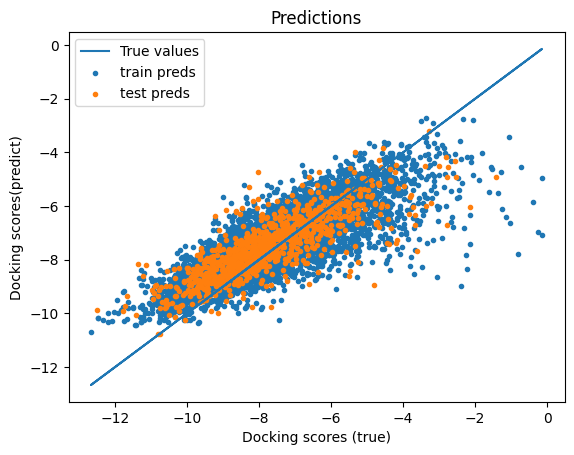

In [10]:
utils.plot_predictions(model, train_data, test_data, transformer)

In [12]:
utils.eval(model, test_data, [transformer])

RMSE   | 0.966
R2     | 0.631
MAE    | 0.721
mean   | -7.508
std    | 1.145


In [13]:
R2 = dc.metrics.Metric(dc.metrics.r2_score)
model.evaluate(valid_data, [R2], [transformer])

{'r2_score': 0.6408397254032309}

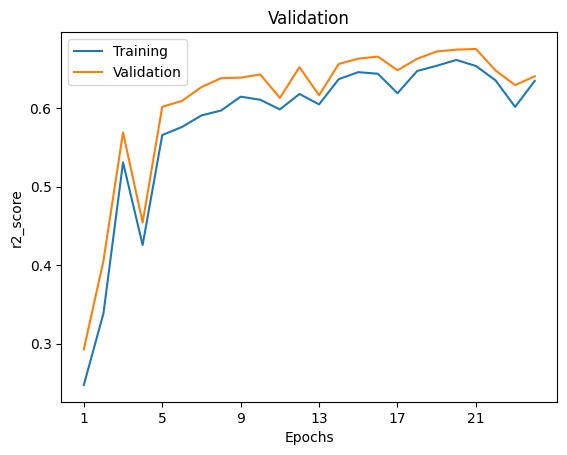

In [14]:
utils.plot_validation(train_model, metric)

In [15]:
# Remember when loading an old model one must also load the data.
# Featurizing the data is not strictly nessecary, but the current utility functions works
# with DeepChems NumpyDatasets so it is more easy to just redo the dataprocessing as usual.
data = utils.load_data('ABC_smiles_data.csv', 600, True)
featurizer = dc.feat.MolGraphConvFeaturizer(use_edges=True)
train_data, valid_data, test_data, transformer = utils.receptor_data(data, 'BCRP', featurizer)

model02 = AttentiveFPModel(
    n_tasks=1,
    mode='regression',
)

model02.restore(model_dir='models/model02.ckpt/')

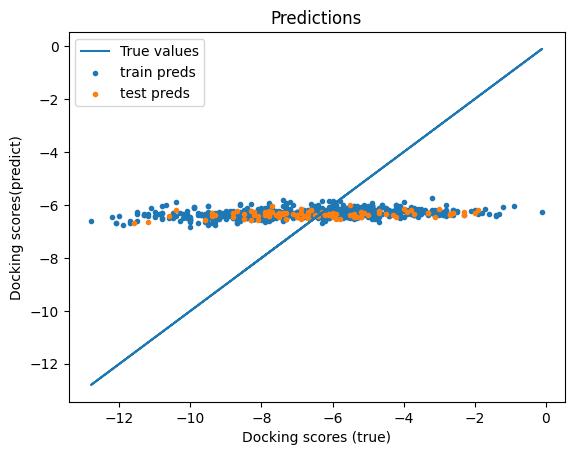

In [16]:

utils.plot_predictions(model02, train_data, test_data, transformer)